In [ ]:
!pip install --upgrade google-auth-oauthlib google-auth-httplib2 google-api-python-client
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from google.colab import drive
from google.colab import auth
import gspread
from google.auth import default # Import the default function for credentials


In [ ]:
# Montar Google Drive (Si no lo has hecho ya)
drive.mount('/content/drive')

# Autenticarse con Google
auth.authenticate_user()

# Get credentials using the 'default' function
credentials, _ = default()

# Authorize gspread with the obtained credentials
gc = gspread.authorize(credentials)

# Reemplaza con el nombre de tu archivo Google Sheet (sin la extensión .gsheet)
nombre_hoja = 'Formulario Bicing (respuestas)' # Solo el nombre, no la ruta completa
try:
    # Abrir la hoja de cálculo por nombre
    hoja = gc.open(nombre_hoja).sheet1 # sheet1 se refiere a la primera hoja

    # Convertir los datos de la hoja a un DataFrame de pandas
    df = pd.DataFrame(hoja.get_all_records())

except gspread.SpreadsheetNotFound:
    print(f"Error: Hoja de cálculo '{nombre_hoja}' no encontrada.")
    exit()
except Exception as e:  # Captura otros errores potenciales
    print(f"Un error ocurrió: {e}")
    exit()



# Descargar recursos de NLTK (si no los tienes ya)
nltk.download('vader_lexicon')
nltk.download('punkt')

# Inicializar el analizador de sentimiento
analyzer = SentimentIntensityAnalyzer()

# Función para analizar el sentimiento de un texto
def analizar_sentimiento(texto):
    scores = analyzer.polarity_scores(texto)
    return scores['compound']  # Devuelve el puntaje compuesto


# Crear una nueva columna con el sentimiento
df['sentimiento'] = df['¿Cómo debería mejorar Bicing?'].apply(analizar_sentimiento)



# Imprimir el DataFrame resultante

display(df)

# Guardar el DataFrame modificado a un nuevo archivo CSV (opcional)

df.to_csv('/content/drive/MyDrive/Proyecto EOI/datos_analizados.csv', index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Marca temporal,¿Cómo estás de satisfecho con el servicio Bicing actual?,¿Cómo estás de satisfecho con el número de bicicletas de Bicing?,¿Consideras que las nuevas bicicletas eléctricas son suficientemente buenas?,¿Consideras que las bicicletas mecánicas son suficientemente buenas?,¿Son suficientes los carriles bici actuales?,¿Cómo estás de satisfecho con el estado de los carriles bici actuales?,¿Consideras que vale la pena el coste del abono anual?,¿Cómo debería mejorar Bicing?,sentimiento
0,27/01/2025 9:56:29,5,3,4,1,4,2,5,"Se debería implementar un sistema de IA, que n...",0.0000
1,27/01/2025 19:20:27,5,5,4,5,5,4,4,El estado de las bicicletas convencionales es ...,0.0000
2,27/01/2025 19:21:19,3,3,2,4,3,4,3,Las bicicletas eléctricas están bien para tray...,0.0000
3,27/01/2025 19:24:43,2,3,4,4,3,3,1,Me pareció caro el bono mensual en relación co...,0.0000
4,27/01/2025 19:25:30,4,5,3,5,3,3,5,El servicio de alquiler de bicis es práctico y...,0.0000
5,27/01/2025 19:27:08,3,5,5,4,1,4,3,Las vías ciclistas en mi zona están bien diseñ...,-0.2960
6,27/01/2025 19:28:15,2,3,2,3,3,3,2,Algunas estaciones de bicis eléctricas no está...,-0.2960
7,27/01/2025 19:29:53,5,5,4,4,5,5,5,Los costes son razonables y las bicicletas cum...,-0.3182
8,27/01/2025 19:32:00,2,3,2,3,4,4,3,Aunque las bicicletas eléctricas son prácticas...,-0.2960
9,27/01/2025 19:34:45,1,2,3,1,3,3,2,El mantenimiento de las bicicletas deja mucho ...,0.0000


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/15FuaPjXENYdOQlSbn3bKZbu3PHrbWvilbRKNdxFcmyo#gid=0


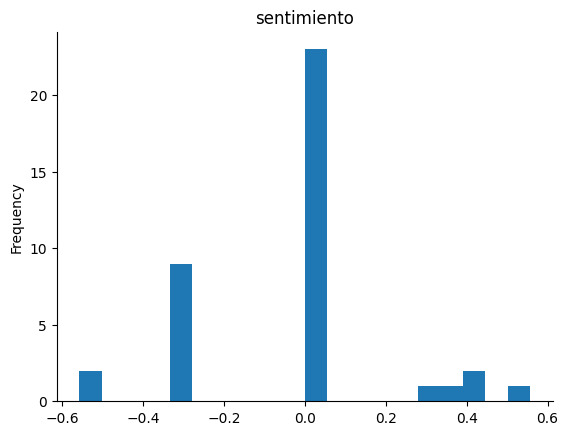

In [ ]:
# @title sentimiento

from matplotlib import pyplot as plt
df['sentimiento'].plot(kind='hist', bins=20, title='sentimiento')
plt.gca().spines[['top', 'right',]].set_visible(False)